In [ ]:
!pip install -U textblob
!pip install -U tweepy
!pip install -U twython

In [ ]:
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import tweepy
import datetime
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from sklearn import svm
from nltk import ngrams
from textblob import TextBlob
from wordcloud import WordCloud
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAMiLXAEAAAAAyoNfR27B9cAlbZuCd8hJbrxfTAU%3DF1KA1luJi8iJDBa3ltqfaqenTSbCLcHTjylRnn1lsiqOUtMSzE"
consumer_key = "74cXsUrzbC1nWJi2nPIUGiu1B"
consumer_secret = "WLcM3XJCqBu3VniDIQzHcuPjRHYnIOETF2XP3CUVYTPwDjnsPg"
access_token = "1470973112963452933-r6n8LPm41WiF8YerDunAK5IDA5PSPA"
access_token_secret = "RHAEHkkJ3j8D6BSo3mS1GifXWNLcdGpOTFcFkC2ifkrOC"

In [ ]:
def percentage(part, whole):
  return 100 * float(part) / float(whole)

In [ ]:
def twitter_client(bearer_token, consumer_key, consumer_secret, access_token, access_token_secret):
  return tweepy.Client(bearer_token, consumer_key, consumer_secret, access_token, access_token_secret)

In [ ]:
client = twitter_client(bearer_token, consumer_key, consumer_secret, access_token, access_token_secret)

In [ ]:
query="#coronavirus"
tweets = client.search_recent_tweets(
    query=query,
    tweet_fields=["id", "created_at", "source", "lang", "text"],
    max_results=100
)

tweet_id = []
tweet_created_at = []
tweet_source = []
tweet_lang = []
tweet_text = []

positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
positive_tweet_list = []
neutral_tweet_list = []
negative_tweet_list = []
sentiment_list = []
sentiment_letters_list = []
wordcloud_text = ""

android_list = []
iphone_list = []
other_list = []

for tweet in tweets.data:
  if tweet.lang == "en":
    replacer_text = re.sub('([^A-Za-z0-9])|(<a href=\\"([^\\"]*)\\">(.*)<\\a>iU)|(https:\/\/(?:www\.)?([a-z0-9\-]+)(?:\.[a-z\.]+[\/]?).*)|(http:\/\/(?:www\.)?([a-z0-9\-]+)(?:\.[a-z\.]+[\/]?).*)', " ", tweet.text).lower()
    tweet_list.append(replacer_text)
    analysis = TextBlob(replacer_text)
    scores = SentimentIntensityAnalyzer().polarity_scores(replacer_text)
    positive = scores["pos"]
    neutral = scores["neu"]
    negative = scores["neg"]
    compound = scores["compound"]
    polarity += analysis.sentiment.polarity

    tweet_id.append(tweet.id)
    tweet_created_at.append(tweet.created_at)
    tweet_source.append(tweet.source)
    tweet_lang.append(tweet.lang)
    tweet_text.append(replacer_text)

    if tweet.source == "Twitter for Android":
      android_list.append(tweet.source)
    elif tweet.source == "Twitter for iPhone":
      iphone_list.append(tweet.source)
    else:
      other_list.append(tweet.source)

    if positive > negative:
      positive_tweet_list.append(replacer_text)
      sentiment_list.append(1)
      positive += 1
    elif negative > positive:
      negative_tweet_list.append(replacer_text)
      sentiment_list.append(2)
      negative += 1
    elif positive == negative:
      neutral_tweet_list.append(replacer_text)
      sentiment_list.append(3)
      neutral += 1

    wordcloud_text = wordcloud_text + replacer_text

for x in sentiment_list:
  if x == 1:
    sentiment_letters_list.append("positive")
  elif x == 2:
    sentiment_letters_list.append("neutral")
  else:
    sentiment_letters_list.append("negative")

df = pd.DataFrame({
    "id": tweet_id,
    "created_at": tweet_created_at,
    "source": tweet_source,
    "lang": tweet_lang,
    "text": tweet_text,
    "sentiment": sentiment_letters_list,
    "compound": compound
})

compression_opts = dict(method="zip", archive_name="twitter_data.csv")
df.to_csv("collection.zip", index=False, compression=compression_opts)

In [ ]:
regexp = r"[a-zA-Z0-9']+"
mask = np.array(Image.open("/content/mask.png"))
wordcloud = WordCloud(
    relative_scaling=0.3,
    min_font_size=1,
    background_color="white",
    width=1024,
    height=768,
    max_words=2000,
    colormap="plasma",
    scale=3,
    font_step=4,
    collocations=False,
    regexp=regexp,
    margin=2
).generate(wordcloud_text)

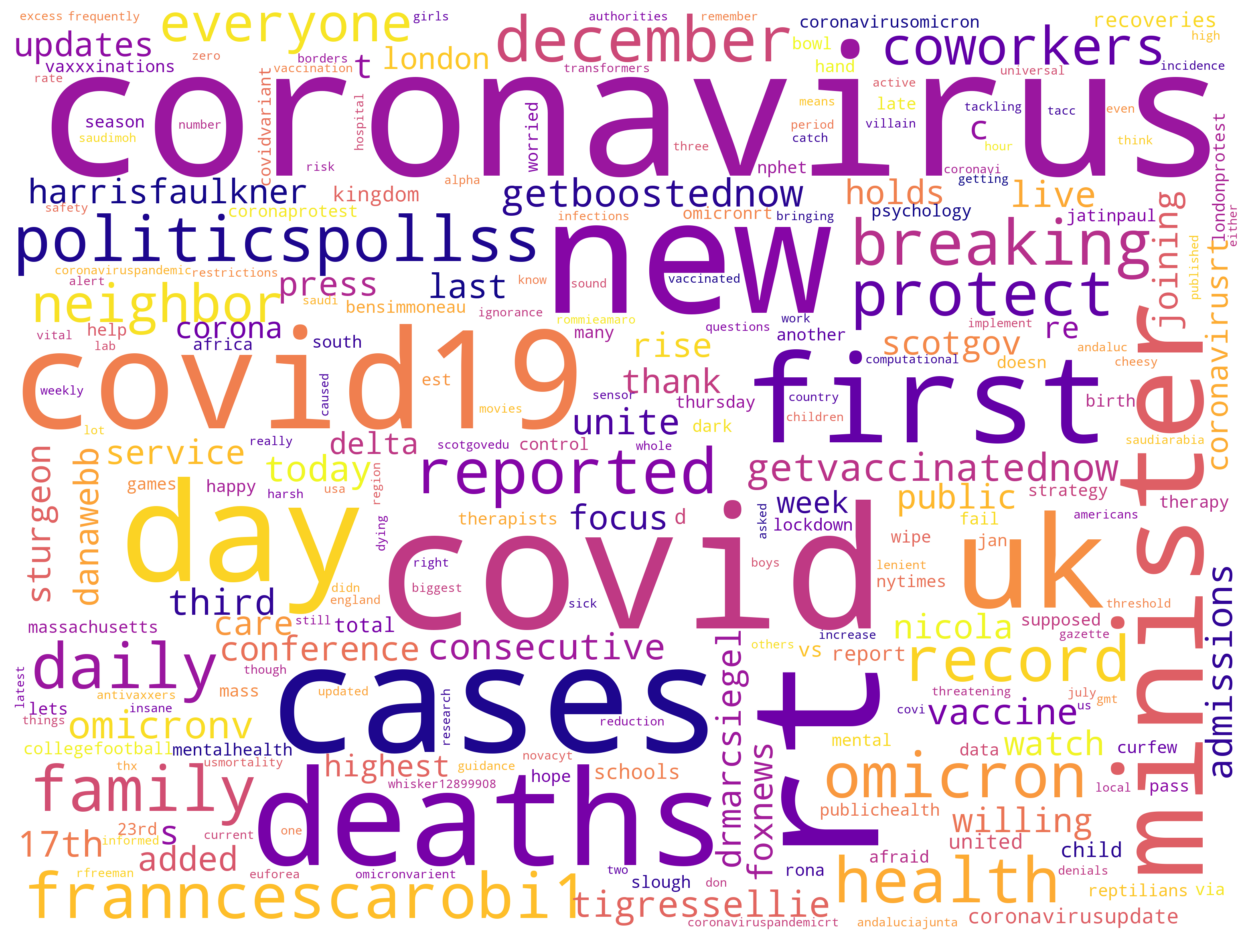

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [ ]:
scores

{'compound': -0.5106, 'neg': 0.142, 'neu': 0.858, 'pos': 0.0}

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
positive_tweet_list = pd.DataFrame(positive_tweet_list)
negative_tweet_list = pd.DataFrame(negative_tweet_list)
neutral_tweet_list = pd.DataFrame(neutral_tweet_list)

In [ ]:
tweet_list

,0
0,rt politicspollss the uk reported 93 045 new covid cases today breaking the daily record for the third consecutive day should the unite
1,vaxxxinations fail it s only a strategy by reptilians for mass birth control coronavirus
2,rt bensimmoneau another late day for me as new coronavirus cases in massachusetts rise 8 from last thursday our highest day since jan
3,happy collegefootball bowl season lets hope the rona doesn t wipe out too many games covid 19 coronavirus
4,omicron and delta 23rd december covid 19 covid19 london slough covidvariant coronavirus corona coronaprotest londonprotest
5,coronavirus if you are willing to care for yourself then i am willing to help care for you but if you re not willing to care for yourself then what am i supposed to do
6,you lives at hand coronavirus covid19 omicron delta
7,via nytimes why 1 320 therapists are worried about mental health mentalhealth health therapy covid19 coronavirus publichealth psychology
8,rt franncescarobi1 protect yourself your family your neighbor your coworkers everyone getvaccinatednow getboostednow omicronv
9,new covid 19 data at 2021 12 17 11 30 00 am est coronavirus covid19 covid 19


In [ ]:
positive_tweet_list

,0
0,happy collegefootball bowl season lets hope the rona doesn t wipe out too many games covid 19 coronavirus
1,coronavirus if you are willing to care for yourself then i am willing to help care for you but if you re not willing to care for yourself then what am i supposed to do
2,you lives at hand coronavirus covid19 omicron delta
3,rt franncescarobi1 protect yourself your family your neighbor your coworkers everyone getvaccinatednow getboostednow omicronv
4,rt jatinpaul coronavirusupdate coronaviruspandemic 69 coronavirus cases reduction of 9 active cases 78 recoveries zero deaths 57
5,rt danawebb drmarcsiegel thank you for your public health service covid19 coronavirus updates on harrisfaulkner focus foxnews c
6,rt politicspollss do you think the united kingdom s current coronavirus restrictions are too lenient too harsh or about right coronavi
7,rt franncescarobi1 protect yourself your family your neighbor your coworkers everyone getvaccinatednow getboostednow omicronv
8,breaking london reports 26 608 new coronavirus cases the biggest one day increase on record
9,rt danawebb drmarcsiegel thank you for your public health service covid19 coronavirus updates on harrisfaulkner focus foxnews c


In [ ]:
negative_tweet_list

,0
0,vaxxxinations fail it s only a strategy by reptilians for mass birth control coronavirus
1,via nytimes why 1 320 therapists are worried about mental health mentalhealth health therapy covid19 coronavirus publichealth psychology
2,andaluc a borders on the high risk threshold with a coronavirus incidence rate of 293 the andaluciajunta region has added 4 710 new infections in the last day the highest number since july and three covid 19 deaths
3,omicron would be a lot more threatening if it didn t sound like a cheesy villain from the transformers movies coronavirus
4,about 1 300 americans are dying from the coronavirus each day thx antivaxxers your ignorance and insane denials are bringing our whole country down
5,rt whisker12899908 the vaccinated are getting sick this means two things their vaccines don t work or their vaccines caused it either


In [ ]:
neutral_tweet_list

,0
0,rt politicspollss the uk reported 93 045 new covid cases today breaking the daily record for the third consecutive day should the unite
1,rt bensimmoneau another late day for me as new coronavirus cases in massachusetts rise 8 from last thursday our highest day since jan
2,omicron and delta 23rd december covid 19 covid19 london slough covidvariant coronavirus corona coronaprotest londonprotest
3,new covid 19 data at 2021 12 17 11 30 00 am est coronavirus covid19 covid 19
4,omicron s afraid of the dark pass it on covid 19 nphet coronavirus lockdown curfew omicron
5,rt tigressellie south africa 17th december omicron 141 admissions added to last week 1283 admissions added to this week 191 more
6,rt politicspollss the uk reported 93 045 new covid cases today breaking the daily record for the third consecutive day should the unite
7,rt scotgov watch live first minister nicola sturgeon holds a press conference on coronavirus covid 19 joining the first minister
8,rt saudi gazette daily report of coronavirus in saudiarabia 550 622 cases 539 885 recoveries 8 860 deaths saudimoh covid
9,rt tigressellie uk december 17th new cases 93 045 new deaths 111 28 d


In [ ]:
print("Total tweet:", len(tweet_list))
print("Total positive tweet:", len(positive_tweet_list))
print("Total neutral tweet:", len(neutral_tweet_list))
print("Total negative tweet:", len(negative_tweet_list))

Total tweet: 43
Total positive tweet: 18
Total neutral tweet: 19
Total negative tweet: 6


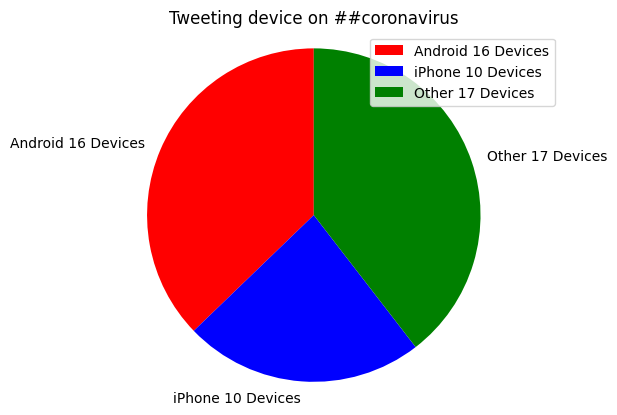

In [ ]:
labels = ["Android {} Devices".format(len(android_list)), "iPhone {} Devices".format(len(iphone_list)), "Other {} Devices".format(len(other_list))]
colors = ["Red", "Blue", "Green"]
sizes = [len(android_list), len(iphone_list), len(other_list)]
plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.legend(labels)
plt.title("Tweeting device on #{}".format(query))
plt.axis("equal")
plt.show()

In [ ]:
positive = percentage(len(positive_tweet_list), len(tweet_list))
neutral = percentage(len(neutral_tweet_list), len(tweet_list))
negative = percentage(len(negative_tweet_list), len(tweet_list))

positive = format(positive, ".1f")
neutral = format(neutral, ".1f")
negative = format(negative, ".1f")

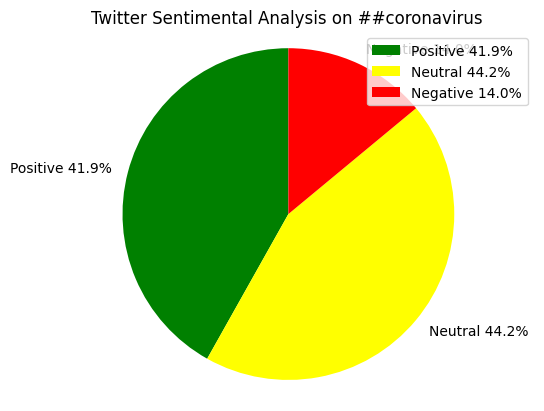

In [ ]:
labels = ["Positive {}%".format(positive), "Neutral {}%".format(neutral), "Negative {}%".format(negative)]
colors = ["Green", "Yellow", "Red"]
sizes = [positive, neutral, negative]
patches, texts = plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Twitter Sentimental Analysis on {}".format(query))
plt.axis("equal")
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(query):
  only_letters = re.sub("[^a-zA-Z]", " ", query)
  tokens = nltk.word_tokenize(only_letters)[2:]
  lower_case = [l.lower() for l in tokens]
  filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
  lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
  
  return lemmas

In [ ]:
pd.set_option("display.max_colwidth", -1)
df["normalized_text"] = df.text.apply(normalizer)
df[["text", "normalized_text"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,text,normalized_text
0,rt politicspollss the uk reported 93 045 new covid cases today breaking the daily record for the third consecutive day should the unite,"[uk, reported, new, covid, case, today, breaking, daily, record, third, consecutive, day, unite]"
1,vaxxxinations fail it s only a strategy by reptilians for mass birth control coronavirus,"[strategy, reptilian, mass, birth, control, coronavirus]"
2,rt bensimmoneau another late day for me as new coronavirus cases in massachusetts rise 8 from last thursday our highest day since jan,"[another, late, day, new, coronavirus, case, massachusetts, rise, last, thursday, highest, day, since, jan]"
3,happy collegefootball bowl season lets hope the rona doesn t wipe out too many games covid 19 coronavirus,"[bowl, season, let, hope, rona, wipe, many, game, covid, coronavirus]"
4,omicron and delta 23rd december covid 19 covid19 london slough covidvariant coronavirus corona coronaprotest londonprotest,"[delta, rd, december, covid, covid, london, slough, covidvariant, coronavirus, corona, coronaprotest, londonprotest]"


In [ ]:
def ngrams(input_list):
  bigrams = [" ".join(t) for t in list(zip(input_list, input_list[1:]))]
  trigrams = [" ".join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]

  return bigrams + trigrams

In [ ]:
df["grams"] = df.normalized_text.apply(ngrams)
df[["grams"]].head()

,grams
0,"[uk reported, reported new, new covid, covid case, case today, today breaking, breaking daily, daily record, record third, third consecutive, consecutive day, day unite, uk reported new, reported new covid, new covid case, covid case today, case today breaking, today breaking daily, breaking daily record, daily record third, record third consecutive, third consecutive day, consecutive day unite]"
1,"[strategy reptilian, reptilian mass, mass birth, birth control, control coronavirus, strategy reptilian mass, reptilian mass birth, mass birth control, birth control coronavirus]"
2,"[another late, late day, day new, new coronavirus, coronavirus case, case massachusetts, massachusetts rise, rise last, last thursday, thursday highest, highest day, day since, since jan, another late day, late day new, day new coronavirus, new coronavirus case, coronavirus case massachusetts, case massachusetts rise, massachusetts rise last, rise last thursday, last thursday highest, thursday highest day, highest day since, day since jan]"
3,"[bowl season, season let, let hope, hope rona, rona wipe, wipe many, many game, game covid, covid coronavirus, bowl season let, season let hope, let hope rona, hope rona wipe, rona wipe many, wipe many game, many game covid, game covid coronavirus]"
4,"[delta rd, rd december, december covid, covid covid, covid london, london slough, slough covidvariant, covidvariant coronavirus, coronavirus corona, corona coronaprotest, coronaprotest londonprotest, delta rd december, rd december covid, december covid covid, covid covid london, covid london slough, london slough covidvariant, slough covidvariant coronavirus, covidvariant coronavirus corona, coronavirus corona coronaprotest, corona coronaprotest londonprotest]"


In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorized_data = count_vectorizer.fit_transform(df.text)
indexed_data = hstack((np.array(range(0, vectorized_data.shape[0]))[:, None], vectorized_data))

In [ ]:
def sentiment_to_target(sentiment):
  return {
      "negative": 0,
      "neutral": 1,
      "positive": 2
  }[sentiment]

targets = df.sentiment.apply(sentiment_to_target)

In [ ]:
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:, 0]
data_train = data_train[:, 5:]
data_test_index = data_test[:, 0]
data_test = data_test[:, 5:]

In [ ]:
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight="balanced", kernel="linear"))
clf_output = clf.fit(data_train, targets_train)

In [ ]:
clf.score(data_test, targets_test)

0.5555555555555556